In [1]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tpot
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

c:\Users\wardj\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('dataset.csv')
features = data.drop(columns='target')
x_train, x_test, y_train, y_test = \
    train_test_split(features, data['target'], random_state=1)

In [3]:
AutoML = tpot.TPOTClassifier(
                            generations=10,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=1,
                            config_dict=None,
                            template=None,
                            warm_start=True,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [4]:
AutoML.fit(x_train, y_train)

                                                                                  
Generation 1 - Current best internal CV score: 0.9392456676860347
                                                                                 
Generation 2 - Current best internal CV score: 0.9437308868501528
                                                                                 
Generation 3 - Current best internal CV score: 0.9449541284403671
                                                                                 
Generation 4 - Current best internal CV score: 0.9449541284403671
                                                                                 
Generation 5 - Current best internal CV score: 0.9469928644240572
                                                                                   
Generation 6 - Current best internal CV score: 0.9482161060142712
                                                                                   
Generation 7 - Current be

TPOTClassifier(generations=10, random_state=1, verbosity=2, warm_start=True)

0.9516819571865444


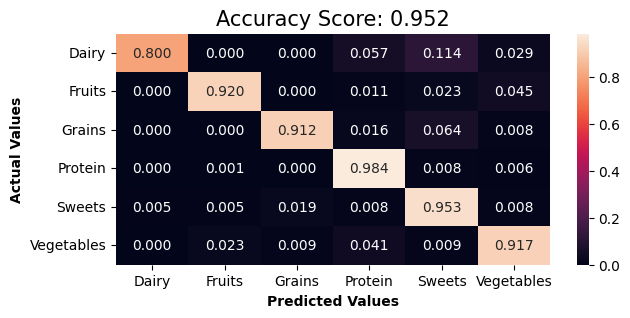

In [5]:
predictions = AutoML.predict(x_test)
print(accuracy_score(y_test, predictions))
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions, normalize='true')
labels = ('Dairy', 'Fruits', 'Grains', 'Protein', 'Sweets', 'Vegetables')
plt.figure(figsize=(7, 3))
sns.heatmap(cm1, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', weight='bold')
plt.ylabel('Actual Values', weight='bold')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [6]:
AutoML.export('pipeline_tpot.py')